In [1]:
from pathlib import Path
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import numpy as np

In [3]:
xray_stat_dfs, rmsd_stat_dfs = list(), list()

target = "7mhf"
job_name = "109_natives_2_cif"

score_field = "xray_0+xray_1"
rmsd_field = "rmsd_avg_0+rmsd_avg_1"

xray_dir = Path(Path.home(), "Documents/xray")
log_stats_dir = Path(xray_dir, "sample_bench/data", target)

for i in range(10):
    xray_stat_df = pd.read_csv(Path(log_stats_dir, job_name, "xray_volume_bench_{}.csv".format(i)), index_col=0)
    rmsd_stat_df = pd.read_csv(Path(log_stats_dir, job_name, "rmsd_volume_bench_{}.csv".format(i)), index_col=0)

    xray_stat_dfs.append(xray_stat_df)
    rmsd_stat_dfs.append(rmsd_stat_df)

In [9]:
all_mins, all_maxes = list(), list()
for xray_stat_df in xray_stat_dfs:
    all_mins.append(xray_stat_df["{}_mean".format(score_field)].min())
    all_maxes.append(xray_stat_df["{}_mean".format(score_field)].max())
print(np.min(all_mins), np.max(all_maxes))

all_mins, all_maxes = list(), list()
for xray_stat_df in xray_stat_dfs:
    all_mins.append(xray_stat_df["{}_mean".format(rmsd_field)].min())
    all_maxes.append(xray_stat_df["{}_mean".format(rmsd_field)].max())
print(np.min(all_mins), np.max(all_maxes))

all_mins, all_maxes = list(), list()
for rmsd_stat_df in rmsd_stat_dfs:
    all_mins.append(rmsd_stat_df["{}_mean".format(rmsd_field)].min())
    all_maxes.append(rmsd_stat_df["{}_mean".format(rmsd_field)].max())
print(np.min(all_mins), np.max(all_maxes))


9.637431852328469 10.13218737493602
0.1590356410281319 0.2019094654237126
0.1471942952978626 0.1892795441388807


In [11]:
all_score_df = pd.concat(xray_stat_dfs)
all_rmsd_df = pd.concat(rmsd_stat_dfs)

score_min = all_score_df["{}_mean".format(score_field)].min()
score_max = all_score_df["{}_mean".format(score_field)].max()

score_rmsd_min = all_score_df["{}_mean".format(rmsd_field)].min()
score_rmsd_max = all_score_df["{}_mean".format(rmsd_field)].max()

rmsd_min = all_rmsd_df["{}_mean".format(rmsd_field)].min()
rmsd_max = all_rmsd_df["{}_mean".format(rmsd_field)].max()


In [12]:
xray_stat_dfs[0]

,n,xray_0+xray_1_mean,xray_0+xray_1_std,rmsd_avg_0+rmsd_avg_1_mean,rmsd_avg_0+rmsd_avg_1_std
1,NaN,9.945627,3.260893e-02,0.179981,8.639118e-03
2,NaN,9.926923,2.699706e-02,0.178188,7.936623e-03
3,NaN,9.918101,2.514758e-02,0.177269,7.201525e-03
4,NaN,9.911939,2.381878e-02,0.177070,7.535081e-03
5,NaN,9.907075,2.249088e-02,0.176491,7.056415e-03
...,...,...,...,...,...
996,NaN,9.837405,1.470228e-03,0.176724,9.788599e-04
997,NaN,9.837366,1.201643e-03,0.176750,8.000394e-04
998,NaN,9.837347,1.041176e-03,0.176762,6.932022e-04
999,NaN,9.837328,8.505427e-04,0.176775,5.662810e-04


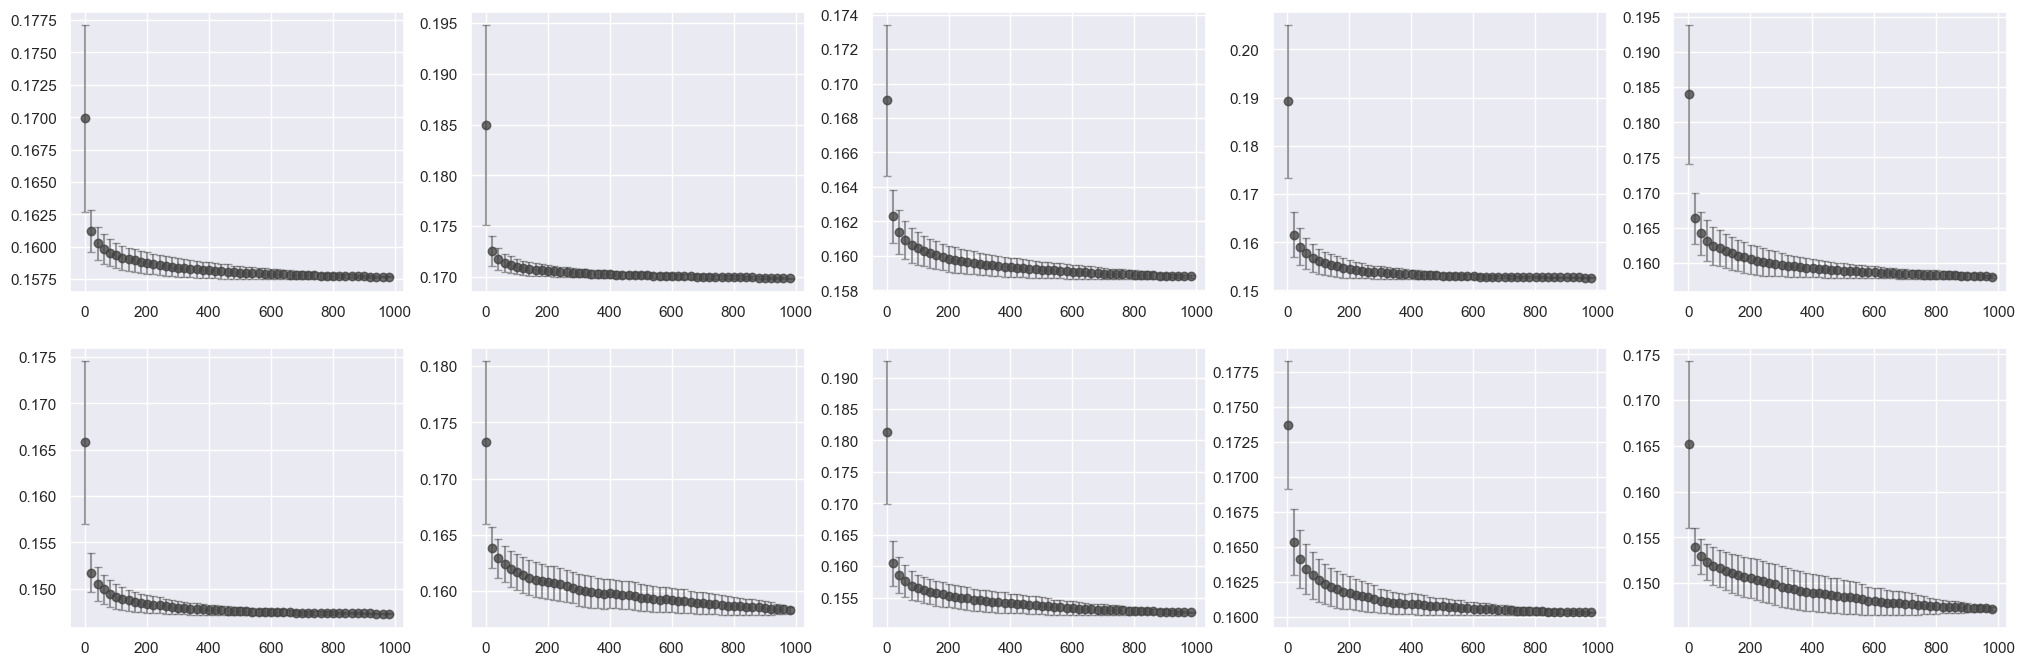

In [15]:
fig, axs = plt.subplots(2, 5, figsize=(25,8))

colors = list()
colors.append(mcolors.CSS4_COLORS["dodgerblue"])
colors.append(mcolors.CSS4_COLORS["orange"])
colors.append(mcolors.CSS4_COLORS["orangered"])

alpha = .5
space = 20

x = xray_stat_dfs[0].index[::space]

for i in range(10):
    y1 = xray_stat_dfs[i]["{}_mean".format(score_field)][::space]
    std1 = xray_stat_dfs[i]["{}_std".format(score_field)][::space]

    y2 = xray_stat_dfs[i]["{}_mean".format(rmsd_field)][::space]
    std2 = xray_stat_dfs[i]["{}_std".format(rmsd_field)][::space]

    y3 = rmsd_stat_dfs[i]["{}_mean".format(rmsd_field)][::space]
    std3 = rmsd_stat_dfs[i]["{}_std".format(rmsd_field)][::space]

    ax1 = axs[i//5][i%5]
    # ax1.set_ylim(score_min-.05, score_max+.05)
    # ax1.scatter(x[:len(y1)], y1, c="#424242ff", alpha=alpha)
    # ax1.errorbar(x[:len(y1)], y1, std1, linestyle='None', marker='o', capsize=3, c="#424242ff", alpha=alpha)

    # ax1.scatter(x[:len(y2)], y2, c="#424242ff", alpha=alpha)
    # ax1.errorbar(x[:len(y2)], y2, std2, linestyle='None', marker='o', capsize=3, c="#424242ff", alpha=alpha)

    ax1.scatter(x[:len(y3)], y3, c="#424242ff", alpha=alpha)
    ax1.errorbar(x[:len(y3)], y3, std3, linestyle='None', marker='o', capsize=3, c="#424242ff", alpha=alpha)

    # ax2 = ax1.twinx()
    # # ax2.set_ylim(score_rmsd_min-.02, score_rmsd_max+.02)
    # ax2.scatter(x[:len(y2)], y2, c="#424242ff", alpha=alpha)
    # ax2.errorbar(x[:len(y2)], y2, std2, linestyle='None', marker='o', capsize=3, c="#424242ff", alpha=alpha)


plt.savefig(Path(Path.home(), "Desktop/sample_volume_benchmark.png"))




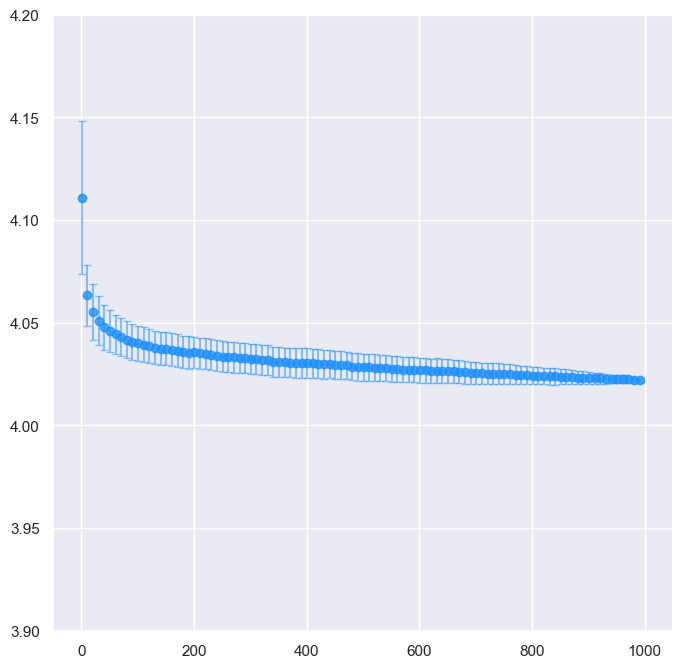

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
x = xray_stat_dfs[0].index[::space]

ax.set_xlim(-50, 1050)
ax.set_ylim(score_min-.05, score_max+.05)
ax.set_ylim(3.9, 4.2)

y1 = xray_stat_dfs[0]["{}_mean".format(field)][::space]
std1 = xray_stat_dfs[0]["{}_std".format(field)][::space]

y2 = xray_stat_dfs[0]["rmsd_avg_0_mean"][::space]
std2 = xray_stat_dfs[0]["rmsd_avg_0_std"][::space]

# ax.scatter(x[:2], y1.iloc[:2], c=colors[0], alpha=alpha)
# ax.errorbar(x[:2], y1.iloc[:2], std1.iloc[:2], linestyle='None', marker='o', capsize=3, c=colors[0], alpha=alpha)

ax.scatter(x[:len(y1)], y1, c=colors[0], alpha=alpha)
ax.errorbar(x[:len(y1)], y1, std1, linestyle='None', marker='o', capsize=3, c=colors[0], alpha=alpha)

# y3 = rmsd_stat_dfs[i]["rmsd_avg_0_mean"][::space]
# std3 = rmsd_stat_dfs[i]["rmsd_avg_0_std"][::space]

# ax3 = axs[i//5][i%5]
# ax3.set_ylim(rmsd_min-.01,rmsd_max+.01)
# ax3.scatter(x[:len(y3)], y3, c=colors[1], alpha=alpha)
# ax3.errorbar(x[:len(y3)], y3, std3, linestyle='None', marker='o', capsize=3, c=colors[1], alpha=alpha)

# plt.show()
plt.savefig(Path(Path.home(), "Desktop/tmp.png"))


In [19]:
x[0]

1